In [20]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt

## Задача 1


Напишите свою собственную функцию вычисления SVD итерационным методом. Сравните
её работу с работой библиотечной функции.

In [81]:
def my_svd(M):
    n = M.shape[0]
    b = np.random.randn(n,1)
    b = b/np.linalg.norm(b)
    dF = 1
    F = np.linalg.norm(M)
    
    svd = []
    
    while (dF > 1e-7 or F > 1e-5):
        F0 = np.copy(F)
        a = M @ b
        M = M - a @ b.T
        svd.append((a.T @ b)[0,0])
        F = np.linalg.norm(M)
        # print(F)
        dF = F0 - F
        # print(dF)
        # print(a)
        # print(b)
        # print(a @ b.T)
        b = (M @ a) / np.linalg.norm(a)
        
    return svd

In [82]:
M = np.eye(10)

In [85]:
A = np.random.randn(5,5)
# A = A @ A.T

In [86]:
my_svd(A)

/tmp/ipykernel_23066/3755232023.py:13: RuntimeWarning: overflow encountered in matmul
  M = M - a @ b.T
/tmp/ipykernel_23066/3755232023.py:14: RuntimeWarning: overflow encountered in matmul
  svd.append((a.T @ b)[0,0])
/tmp/ipykernel_23066/3755232023.py:22: RuntimeWarning: invalid value encountered in true_divide
  b = (M @ a) / np.linalg.norm(a)


[0.37932794919784285,
 3.6313806787600313,
 -32.27593793089667,
 24855.631508530816,
 -15301843785157.287,
 3.582871973608659e+39,
 -4.599322569737885e+118,
 inf,
 nan]

In [78]:
M[M>1e-10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
a = np.random.randn(3)

In [19]:
b = np.random.randn(3)

In [24]:
np.kron(a, b)

array([-0.02225578, -0.14988021, -0.02717537, -0.12237603, -0.82413414,
       -0.14942702,  0.1849065 ,  1.2452419 ,  0.22577974])

In [25]:
a = a.reshape(-1, 1)
b = b.reshape(-1, 1)

In [41]:
(a.T @ b )[0,0]

-0.6206101738762485

## Задача 2

Написать программу, которая генерирует случайные разреженные матрицы

In [21]:
import scipy.sparse as spar

In [59]:
n = 100
p = 0.01
X = spar.random(n, n, density=p)
u, sigma, v = spar.linalg.svds(X.asfptype(), k=n-1,  which='LM')
sigma = sigma[::-1]
sigma

array([1.79546805, 1.61264394, 1.46194023, 1.43556941, 1.37268286,
       1.22136048, 1.18753431, 1.17170604, 1.13915584, 1.0888378 ,
       1.082748  , 1.01654049, 0.9956047 , 0.96256521, 0.94649217,
       0.94402238, 0.93116127, 0.93054012, 0.89318826, 0.88824812,
       0.88634717, 0.863825  , 0.86300156, 0.84588309, 0.81907562,
       0.80620197, 0.7532441 , 0.7432375 , 0.72962444, 0.7120071 ,
       0.68406028, 0.67198485, 0.66599826, 0.65336631, 0.62515938,
       0.58917636, 0.55593504, 0.54611354, 0.50349452, 0.46520992,
       0.37218108, 0.37186361, 0.3697764 , 0.35239288, 0.32624518,
       0.2820348 , 0.25789638, 0.23568301, 0.21624466, 0.1959908 ,
       0.08724441, 0.07752948, 0.06582087, 0.04563729, 0.02058998,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

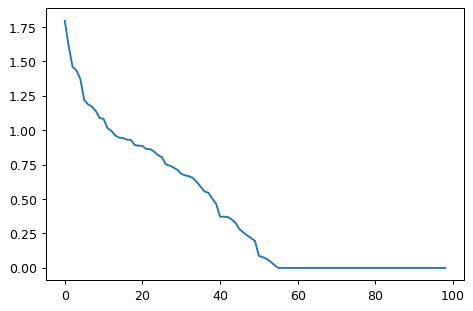

In [62]:
plt.subplots(1,1, dpi=90)

plt.plot(sigma)
plt.show()

## Задача 3

In [135]:
def pseudo_inv(M):
    L = np.linalg.norm(M)
    U, S, VT = np.linalg.svd(M, full_matrices=False)
    # print(U @ np.diag(S) @ VT)
    invS = np.diag(1/S) 
    invS = invS*(np.abs(invS) < 1e14)
    invM = VT.T @ invS @ U.T
    invM = invM *(np.abs(invM) > 1e-9)
    return invM

In [121]:
def pseudo_inv_noisy(M):
    L = np.linalg.norm(M)
    U, S, VT = np.linalg.svd(M, full_matrices=False)
    
    invM = VT.H @ np.diag(1/S) @ U.H
    # print((np.abs(invM) > 1e-13))
    invM = invM *(np.abs(invM) > 1e-13)
    return invM

In [161]:
B = np.array([[0, 1, 2, 4],[3, 2, 1, -5],[0, 3, 4, 1]])

In [169]:
B @ pseudo_inv(B)

array([[ 1.00000000e+00, -3.46944695e-17, -1.66533454e-16],
       [-2.22044605e-16,  1.00000000e+00, -4.44089210e-16],
       [ 3.33066907e-16, -1.94289029e-16,  1.00000000e+00]])

In [174]:
pseudo_inv(B.T) @ B.T

array([[ 1.00000000e+00,  8.88178420e-16,  4.99600361e-16],
       [ 2.35922393e-16,  1.00000000e+00,  3.60822483e-16],
       [-2.77555756e-16, -1.11022302e-16,  1.00000000e+00]])

In [122]:
A = [[0, 1, 2],[3, 2, 1],[0, 3, 4]]

In [152]:
mu = []
rep = 400
for n in range(1,41):
    sm = 0
    for _ in range(rep):
        A = np.random.randn(n,n)
        invA = pseudo_inv(A)
        sm += np.linalg.norm(A) * np.linalg.norm(invA)/rep
    
    mu.append(sm)
    

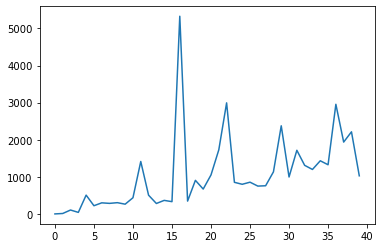

In [153]:
plt.plot(mu)

In [137]:
E = A @ invA 
E*(np.abs(E)>1e-14)


array([[ 1.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.,  0., -0.,  0.,  0., -0.,  0.],
       [-0., -0.,  1.,  0., -0., -0., -0.,  0.,  0., -0.],
       [ 0.,  0., -0.,  1.,  0.,  0.,  0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0.,  1., -0., -0.,  0.,  0., -0.],
       [-0., -0., -0.,  0.,  0.,  1., -0.,  0.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0., -0.,  0.],
       [-0.,  0., -0., -0.,  0., -0.,  0.,  1., -0.,  0.],
       [-0.,  0.,  0.,  0.,  0., -0., -0., -0.,  1.,  0.],
       [ 0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  1.]])

## Задача 4

In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [222]:
def solve_lsq(M):
    M = M.astype("float64")
    
    Q, R = np.linalg.qr(M)
    f = Q.T @ y
    
    f = f.astype("float64")
    
    f = f.reshape(1, -1)
    n = f.shape[1]
    
    w = np.zeros(n)
    
    # if get_rang(M) != n:
    #     return "err: вырожденная матрица"
    
    Rf = np.concatenate((R, f.reshape(n, 1)), axis=1)
    # Mf = gauss(Mf)
    
    for i in range(n-1, -1, -1):
        tmp = 0.
        
        for j in range(i + 1, n):
            tmp += w[j] * Rf[i, j]
    
        w[i] = (Rf[i, n] - tmp) / Rf[i, i]
    return w

In [223]:
# generating matrix with uniformly random elements

A = np.random.random((2,2))*2 - 1
A = A.T @ A

cov = np.linalg.inv(2*A)
mean = np.zeros(2)

N = 50

data = np.random.multivariate_normal(mean, cov, N)

In [244]:
x = np.linspace(0, 10, 20)
y = np.cos(x) + np.random.normal(0, 1e-1, x.shape)

In [257]:
MAX_ORDER = 5

# Ns = np.linspace(0, 1, N)
# print(x.shape)

poly = PolynomialFeatures(MAX_ORDER)
X = poly.fit_transform(x.reshape(-1, 1))

In [253]:
Q, R = np.linalg.qr(X)
rhs = Q.T @ y

In [249]:
R.shape

(6, 6)

In [251]:
y.shape

(20,)

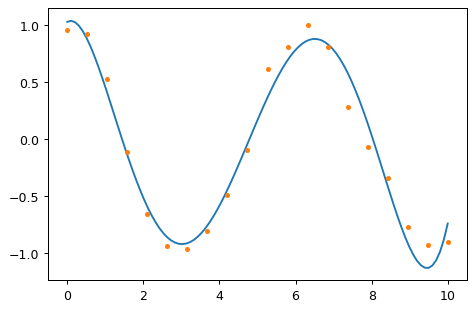

In [256]:
w = solve_lsq(X)

xfit = np.linspace(0,10,100)

Xfit = poly.fit_transform(xfit.reshape(-1, 1))

yfit = Xfit @ w


fig, axs = plt.subplots(1,1, dpi=90)

plt.plot(xfit, yfit)
plt.plot(x, y, "o", markersize=3)

plt.show()